In [94]:
import os
import numpy as np
import pickle
import pandas as pd
from scipy.stats import zscore
from brainbox.io.one import SessionLoader
from sklearn.preprocessing import StandardScaler
import gc
import concurrent.futures
import seaborn as sns
from matplotlib import pyplot as plt

from functions import idxs_from_files
from one.api import ONE
one = ONE(mode='remote')


In [95]:
prefix = '/home/ines/repositories/'
prefix = '/Users/ineslaranjeira/Documents/Repositories/'

In [96]:
extra_sessions = ['2d7c0f7f-e805-404b-914a-23d83998e08e',
'7691eeb3-715b-4571-8fda-6bb57aab8253',
'a28746ff-a6e0-403d-a11d-893c2f9a44b4',
'f140a2ec-fd49-4814-994a-fe3476f14e66',
'bd8b204f-a42e-45c1-a8f0-71c6223a6657',
'e4fac833-d985-4bb2-a97a-c4d7ed8d06e1',
'13b70283-e8d3-4e69-ae3f-83f50c9602e2',
'e34ee0ad-3ad8-4faa-b4d5-c1cc0cf3b496',
'f3eeb2d4-87ce-49ae-8a74-21665f6f1536',
'd9f0c293-df4c-410a-846d-842e47c6b502',
'86f741b4-9dee-4c28-8ee9-49f3656ab419',
'650a0a90-4bf3-4489-9bcd-75baf0a49eac',
'a2be3311-de26-48b3-bfc7-317e94a4fdd3',
'12f95449-6914-4d76-9eb3-7d79757a4a77',
'd9907ac3-7378-471d-91fb-c8ec34870e17',
'b4a8ec28-46ad-4b6f-908b-650d0970a0db',
'c51f34d8-42f6-4c9c-bb5b-669fd9c42cd9',
'71963e7f-5947-4c3e-bcc8-dfdef3d71be7',
'7471a326-894d-4b55-8b01-a0ad56af209c',
'8839a67d-991a-4694-9c45-b3af73ce4d36',
'db4fe6df-b1d2-4958-9c93-e71696d58f7f',
'80653a5b-c7aa-479d-9ae0-c92f296fface',
'169c9a39-cb63-4b77-93e2-10e076d4c472',
'495bee7e-b58e-42ea-8481-4a1bfedca54a',
'1db57661-5ad3-4465-b9ee-08473af9c2e8',
'3513e7f2-d2e6-4411-8055-54dac50458f6',
'd035c5ba-d51e-49a9-a94b-23531a598ec3',
'6a369bfa-a70b-4147-af25-d03772ff8d96',
'7050ae29-a99e-43f1-aa42-b4416200351c',
'3fa080ff-bcce-43e8-bd5f-601f0591f785',
'369c3073-e886-4b28-a32b-a5860df21392',
'aa8c915b-cc12-4022-8339-3faa438d7fe2',
'8b422ab2-fc98-4d25-ac1f-e239ca869d9e',
'87d86bb0-72d3-4213-be72-392295d3d601',
'2ab80a04-96f6-45f8-bf69-7eac67f81742',
'57701dff-8107-4ab6-ac7a-b087a2e4cc94',
'42541dce-2ffb-452e-bf54-119aee2ae48a',
'89848cb4-77d3-4db2-877e-2fa73a3cf5f6',
'33cbe984-deb7-489c-add6-d98ac9f64df6',
'0b5f5111-5647-4400-8e08-f57975027b5e',
'9e77877d-6fcf-4e91-9337-4b19277561d5',
'dc36f1b9-5dba-49c4-b333-ad08af6b8f86',
'8a039e2b-637e-45ed-8da6-0641924626f0',
'00d3c9ea-2c91-44c2-b03e-6dfec5e08f27',
'e698b903-98ed-48b9-bc40-664274f722da',
'e5094e8a-cd54-43d4-8a7a-c5aa54b15e19',
'09137957-7216-40ea-90b5-ef85a62b578a',
'03f0ed7f-e647-4732-ae1a-d41fc459138b',
'4373de88-6b08-4185-a224-f898fd0017d4',
'30c4e2ab-dffc-499d-aae4-e51d6b3218c2',
'1e07df0b-205b-4c94-8e02-2ae07dae4347',
'5c7d2345-1f0e-40e5-aad7-2c6133b71b09',
'1735d2be-b388-411a-896a-60b01eaa1cfe',
'14736609-bfdd-4620-8e47-09d7f4bc4412',
'4537bd9a-0a63-4462-870c-5f6d70d289ed',
'1715d2bc-4da3-4de2-9631-3ab1c600f2bf',
'aed404ce-b3fb-454b-ac43-2f12198c9eaf',
'f115196e-8dfe-4d2a-8af3-8206d93c1729',
'5c454bcb-ae77-42da-a8d2-b6463ea9f21b',
'c728f6fd-58e2-448d-aefb-a72c637b604c',
'c8fc81e8-fd09-4228-a08c-81c01f21381a',
'7502ae93-7437-4bcd-9e14-d73b51193656',
'297bd519-78f8-45d2-af85-835e865e228f',
'7b074b1a-6576-4380-91e4-ad6cdf06c3a6',
'064a7252-8e10-4ad6-b3fd-7a88a2db5463']

In [97]:
sessions_to_exclude = ['2d7c0f7f-e805-404b-914a-23d83998e08e', # bad right cam
'7691eeb3-715b-4571-8fda-6bb57aab8253', # bad view of paws
'bd8b204f-a42e-45c1-a8f0-71c6223a6657', # bad right camera
'f3eeb2d4-87ce-49ae-8a74-21665f6f1536', # moving licks
'650a0a90-4bf3-4489-9bcd-75baf0a49eac', # licks fail
'495bee7e-b58e-42ea-8481-4a1bfedca54a', # timestamps
'1db57661-5ad3-4465-b9ee-08473af9c2e8', # timestamps
'6a369bfa-a70b-4147-af25-d03772ff8d96', # timestamps
'7050ae29-a99e-43f1-aa42-b4416200351c', # timestamps
'3fa080ff-bcce-43e8-bd5f-601f0591f785', # timestamps
'5c454bcb-ae77-42da-a8d2-b6463ea9f21b', # bad licks
'c728f6fd-58e2-448d-aefb-a72c637b604c' # no data can be loaded
]

In [98]:
sessions_to_process = [x for x in extra_sessions if x not in sessions_to_exclude]

In [99]:
# Loop through animals
data_path = prefix + 'representation_learning_variability/paper-individuality/data/design_matrices/extra_bwm/'
all_files = os.listdir(data_path)
design_matrices = [item for item in all_files if 'design_matrix' in item and 'standardized' not in item]
idxs, mouse_names = idxs_from_files(design_matrices)

wheel_k = 3
paw_k = 8

paw_wavelet_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_wavelets/extra_bwm/'
paw_states_path = prefix + 'representation_learning_variability/paper-individuality/data/paw_most_likely_states/'

wheel_wavelet_path = prefix + 'representation_learning_variability/paper-individuality/data/wheel_wavelets/extra_bwm/'
wheel_states_path = prefix + 'representation_learning_variability/paper-individuality/data/wheel_most_likely_states/'

In [130]:
paw_fix_mapping = {0:4, 1:1, 2:5, 3:7, 4:6, 5:2, 6:0, 7:3}
paw_fix_mapping = {0: 4,
        1:0,
        2:3,
        3:1,
        4:6,
        5:7,
        6:2,
        7:5
        }  # for z-scored t-SNE
wheel_fix_mapping = {0:1, 1:0, 2:2} 

paw_func = np.vectorize(paw_fix_mapping.get)
wheel_func = np.vectorize(wheel_fix_mapping.get)

In [131]:
all_sessions = pd.DataFrame()

for m, mat in enumerate(idxs):
    mouse_name = mat[37:]
    session = mat[:36]

    if session not in sessions_to_exclude:
        filename = data_path + "design_matrix_" + str(session) + '_'  + mouse_name
        design_matrix = pd.read_parquet(filename)
        design_matrix['paw_states'] = design_matrix['Bin'] * np.nan
        design_matrix['wheel_states'] = design_matrix['Bin'] * np.nan

        array = np.array(design_matrix[['Bin', 'avg_wheel_vel']]) 
        not_nan_wheel = ~np.isnan(array).any(axis=1)
        # Load wheel states 
        states_filename = wheel_states_path + "most_likely_states_" + str(wheel_k) + '_'  + mouse_name + session + '.npy'
        wheel_most_likely_states = np.load(open(states_filename, "rb"))
        assert len(wheel_most_likely_states) == len(design_matrix[not_nan_wheel])
        design_matrix['wheel_states'][not_nan_wheel] = wheel_most_likely_states

        array = np.array(design_matrix[['Bin', 'l_paw_x', 'l_paw_y', 'r_paw_x', 'r_paw_y']]) 
        not_nan_paw = ~np.isnan(array).any(axis=1)
        # Load paw states
        states_filename = paw_states_path + "most_likely_states_" + str(paw_k) + '_'  + mouse_name + session + '.npy'
        paw_most_likely_states = np.load(open(states_filename, "rb"))
        try:
            assert len(paw_most_likely_states) == len(design_matrix[not_nan_paw])
            design_matrix['paw_states'][not_nan_paw] = paw_most_likely_states
        except Exception:
            print(Exception)
            print(len(paw_most_likely_states))
            print(len(design_matrix[not_nan_paw]))

        design_matrix['mouse_name'] = mouse_name
        design_matrix['session'] = session

        design_matrix['wheel_states'] = wheel_func(design_matrix['wheel_states'])
        design_matrix['paw_states'] = paw_func(design_matrix['paw_states'])

        all_sessions = pd.concat([all_sessions, design_matrix])


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3218538190.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['wheel_states'][not_nan_wheel] = wheel_most_likely_states
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c4

<class 'Exception'>
250824
250826


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3218538190.py:28: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['paw_states'][not_nan_paw] = paw_most_likely_states
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn

<class 'Exception'>
307947
308032


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3218538190.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['wheel_states'][not_nan_wheel] = wheel_most_likely_states
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c4

<class 'Exception'>
251482
251492


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3218538190.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['wheel_states'][not_nan_wheel] = wheel_most_likely_states
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c4

<class 'Exception'>
177200
177242


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3218538190.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['wheel_states'][not_nan_wheel] = wheel_most_likely_states
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c4

<class 'Exception'>
164385
164395


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3218538190.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['wheel_states'][not_nan_wheel] = wheel_most_likely_states
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c4

<class 'Exception'>
293230
293293


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3218538190.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['wheel_states'][not_nan_wheel] = wheel_most_likely_states
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c4

<class 'Exception'>
312351
312983


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3218538190.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['wheel_states'][not_nan_wheel] = wheel_most_likely_states
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c4

<class 'Exception'>
263667
263701


/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3218538190.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  design_matrix['wheel_states'][not_nan_wheel] = wheel_most_likely_states
/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c4

# Plotting

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/4027359420.py:17: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


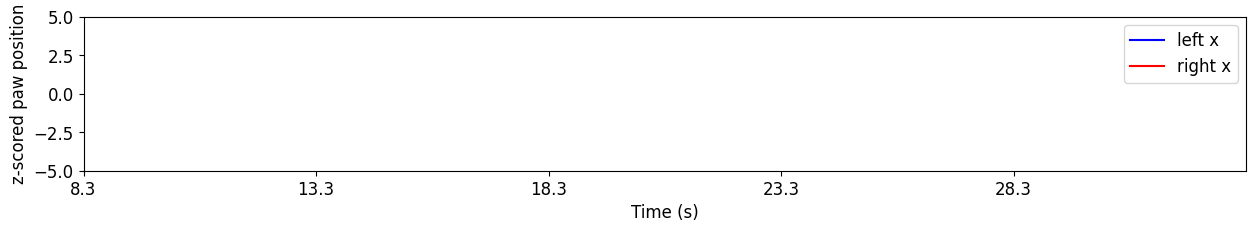

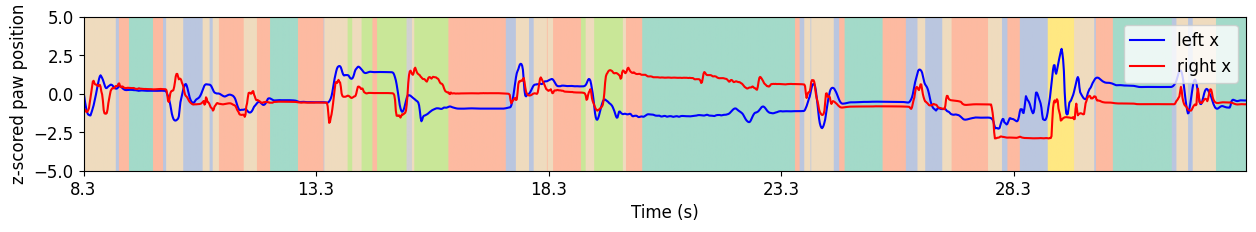

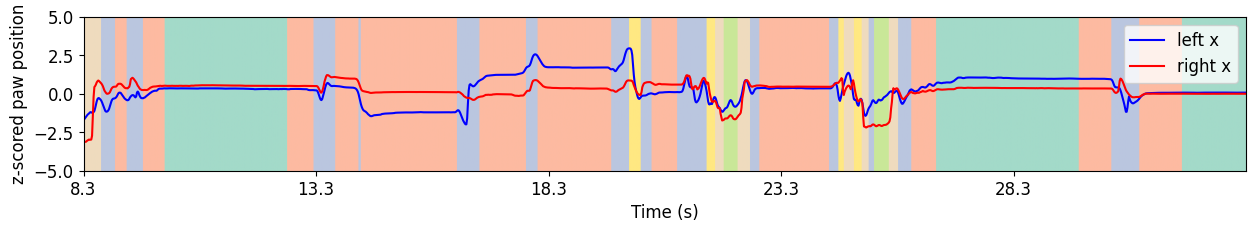

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/4027359420.py:17: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


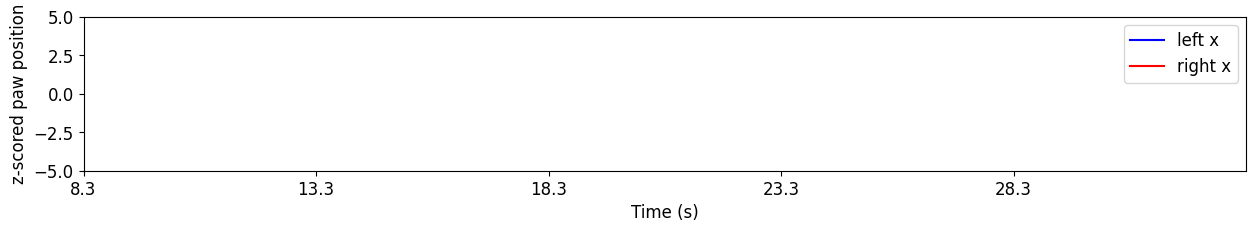

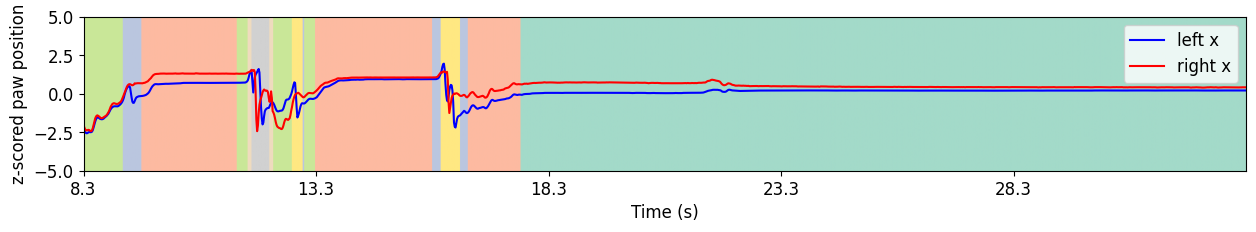

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/4027359420.py:17: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


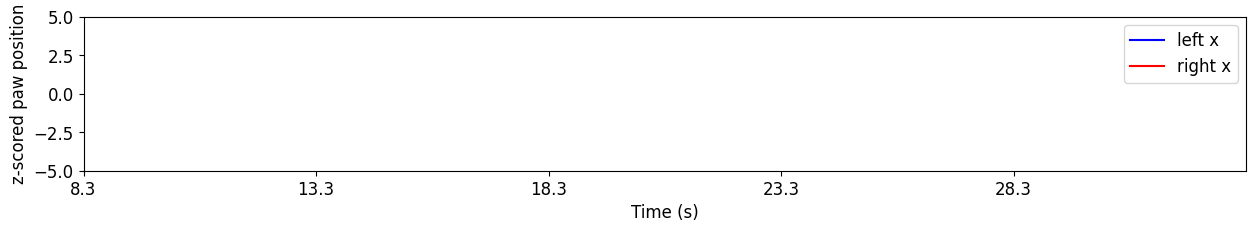

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/4027359420.py:17: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


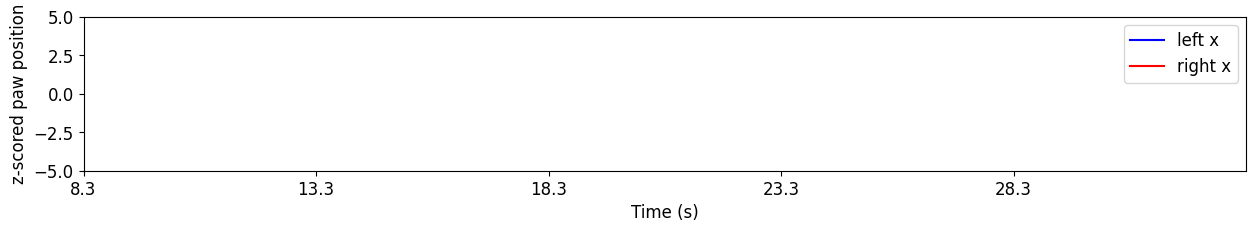

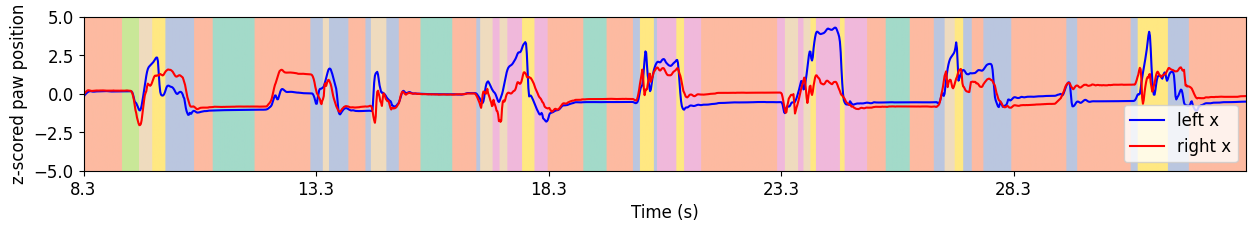

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/4027359420.py:17: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


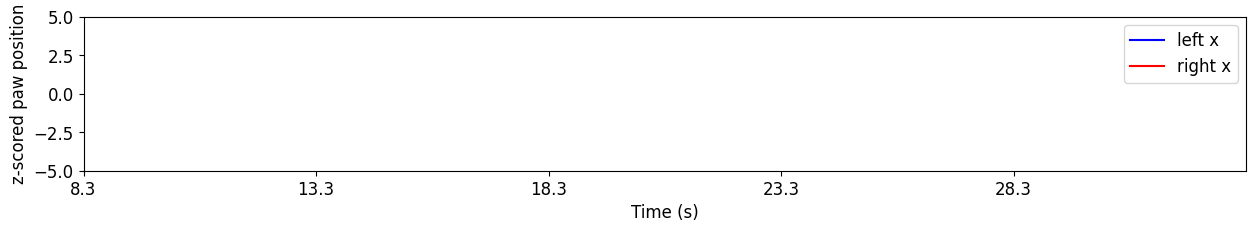

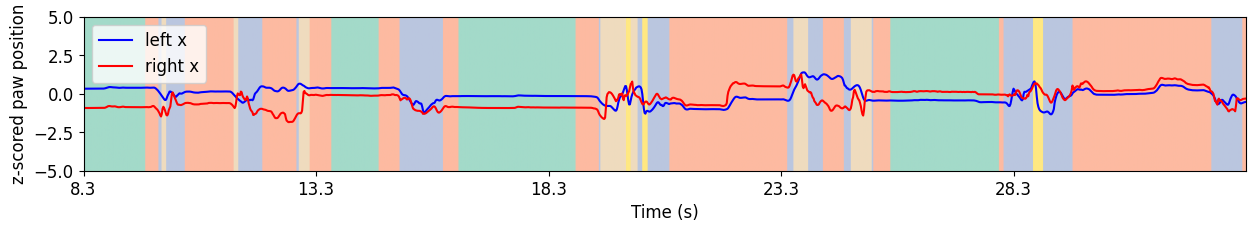

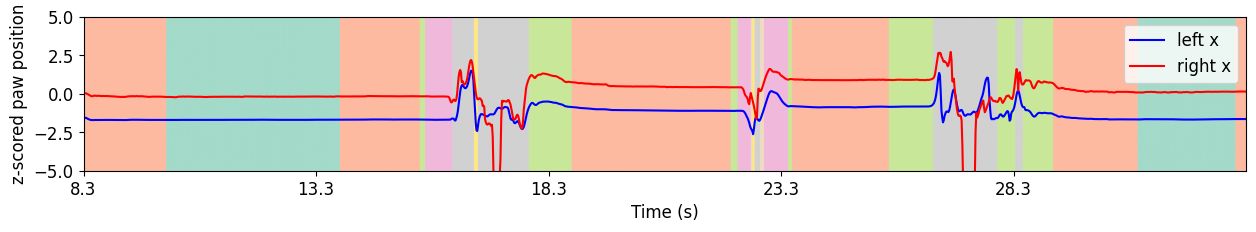

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/4027359420.py:17: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


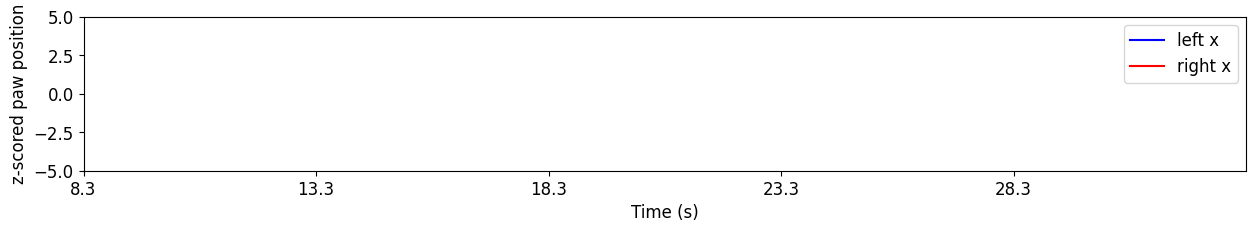

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/4027359420.py:17: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


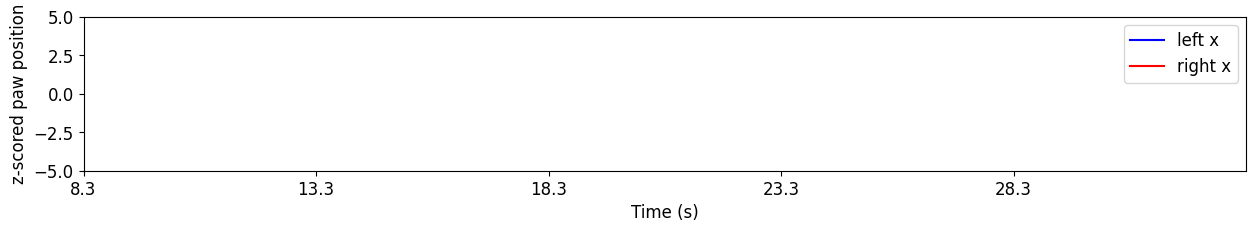

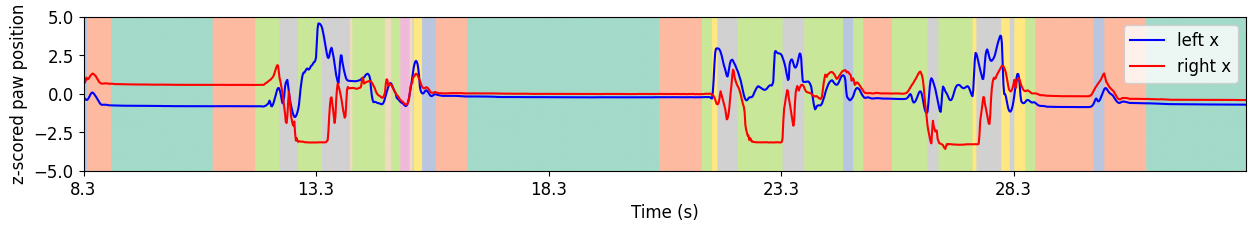

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/4027359420.py:17: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


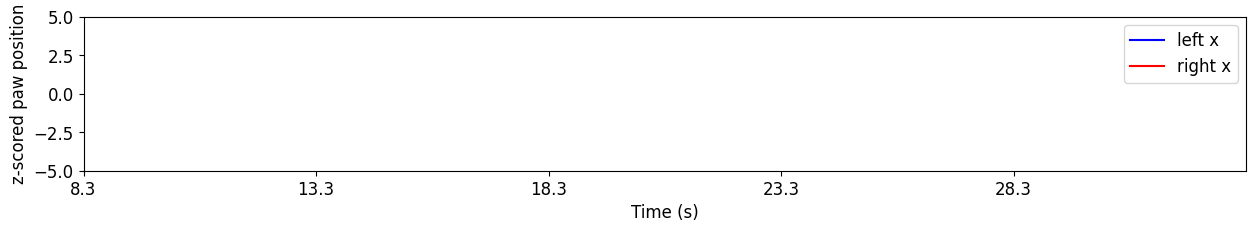

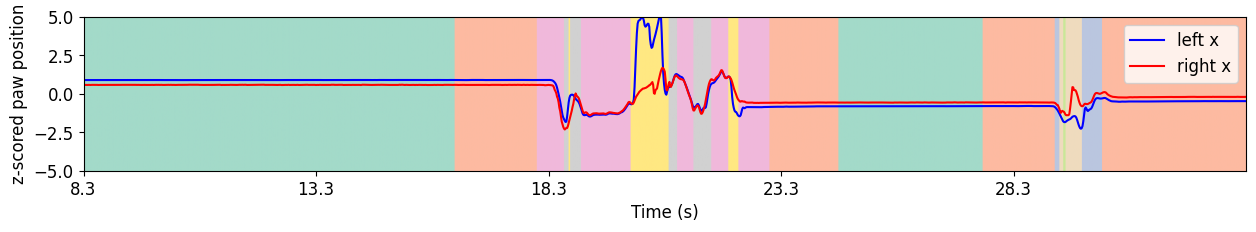

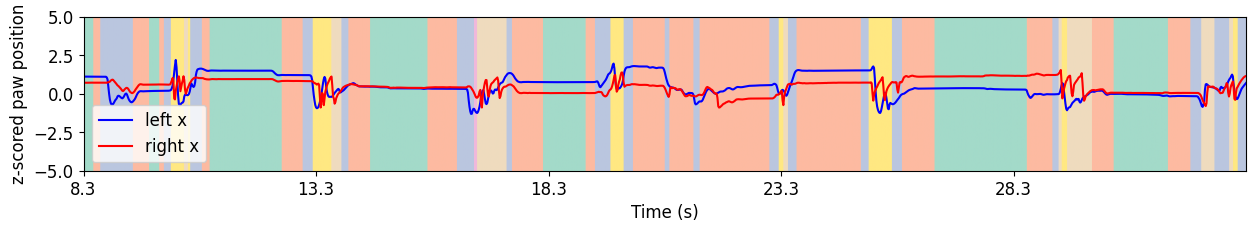

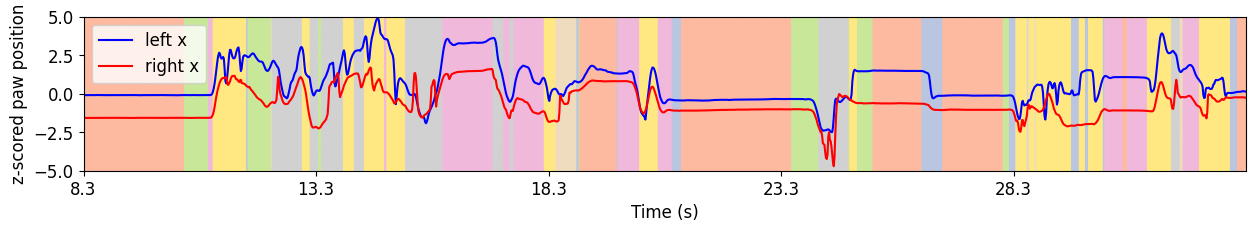

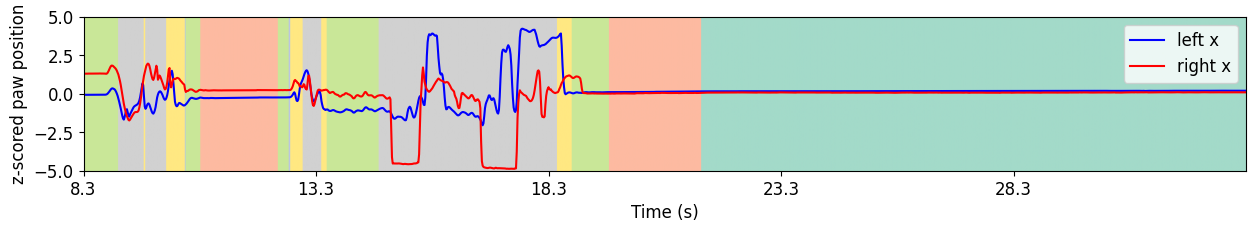

In [132]:
palette = sns.color_palette('Set2', n_colors=paw_k, as_cmap=True)


for m, mat in enumerate(all_sessions['session'].unique()):
    design_matrix = all_sessions.loc[all_sessions['session']==mat][['Bin', 'l_paw_x', 'r_paw_x', 'paw_states']].dropna(axis=0)
    design_matrix['paw_states'] = design_matrix['paw_states'].astype(float)

    fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 2])
    plt.rc('font', size=12)
    init = 500
    # ax.plot(design_matrix.loc[design_matrix['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    ax.plot(zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_y'].reset_index()['l_paw_y'], nan_policy='omit'), linestyle='--', color='green', label='left y')
    ax.plot(zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_y'].reset_index()['r_paw_y'], nan_policy='omit'), linestyle='--',color='red', label='right y')
    attach_array = np.arange(0, paw_k, 1)
    ax.imshow(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],
                extent=(0, len(np.concatenate([design_matrix.loc[design_matrix['Bin']>=init, 'paw_states'].reset_index()['paw_states']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap=palette)  # 
    plt.xlim([init, init+1500])
    plt.ylabel('z-scored paw position')
    plt.xlabel('Time (s)')
    plt.ylim([-5, 5])
    inter = 1500
    frame_rate = 60
    plt.xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    # plt.xticks([2000, 2200, 2400, 2600, 2800, 3000], np.round(0.017*np.array([2000, 2200, 2400, 2600, 2800, 3000]), 2))
    plt.legend()
    plt.show()

In [137]:
def add_most_likely_state(df, state_columns, new_column="left_paw_cameraL"):
    """
    df : pandas DataFrame
    state_columns : list of column names containing state probabilities
    new_column : name of output column
    """

    df[new_column] = df[state_columns].idxmax(axis=1)
    return df


In [253]:
var_left = ['leftCam_paw_r_still',  'leftCam_paw_r_move',  'leftCam_paw_r_wheel_turn',  'leftCam_paw_r_groom']
var_right = ['rightCam_paw_r_still',  'rightCam_paw_r_move',  'rightCam_paw_r_wheel_turn',  'rightCam_paw_r_groom']

new_df = add_most_likely_state(all_sessions, var_left, new_column="left_paw")
new_df = add_most_likely_state(all_sessions, var_right, new_column="right_paw")

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/3284919656.py:8: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  df[new_column] = df[state_columns].idxmax(axis=1)


In [254]:
fix_label = {'leftCam_paw_r_still':'still',  'leftCam_paw_r_move':'move',  'leftCam_paw_r_wheel_turn':'wheel',  'leftCam_paw_r_groom':'groom',
             'rightCam_paw_r_still':'still',  'rightCam_paw_r_move':'move',  'rightCam_paw_r_wheel_turn':'wheel',  'rightCam_paw_r_groom':'groom'} 
label_func = np.vectorize(fix_label.get)
new_df['left_paw'] = label_func(new_df['left_paw'])
new_df['right_paw'] = label_func(new_df['right_paw'])

In [256]:
new_df['both_paws'] = 0
new_df.loc[new_df['left_paw']==new_df['right_paw'], 'both_paws'] = 1
new_df['joint'] = new_df['right_paw']+new_df['left_paw']

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],


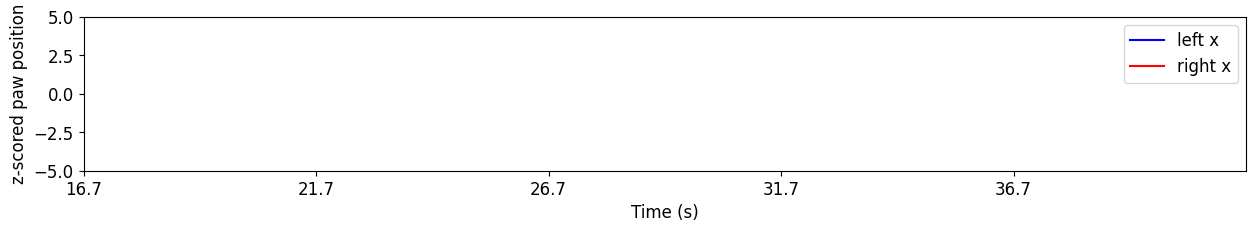

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


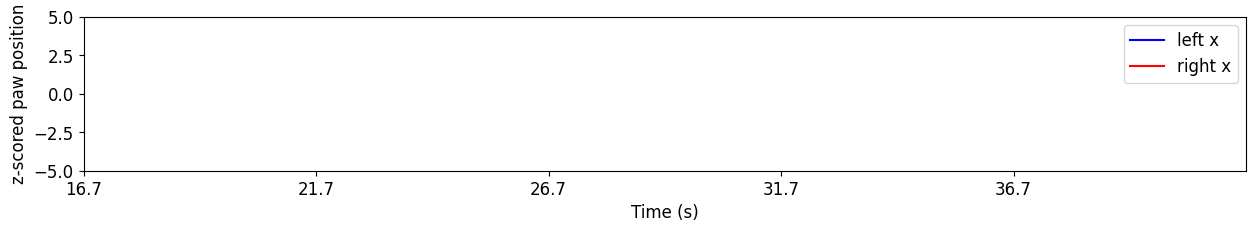

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],


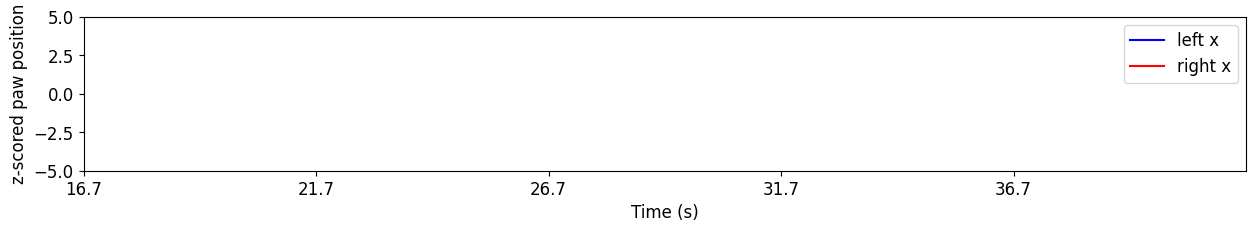

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


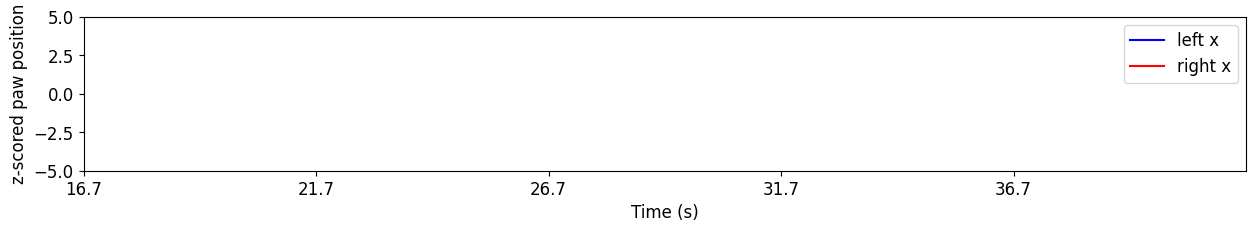

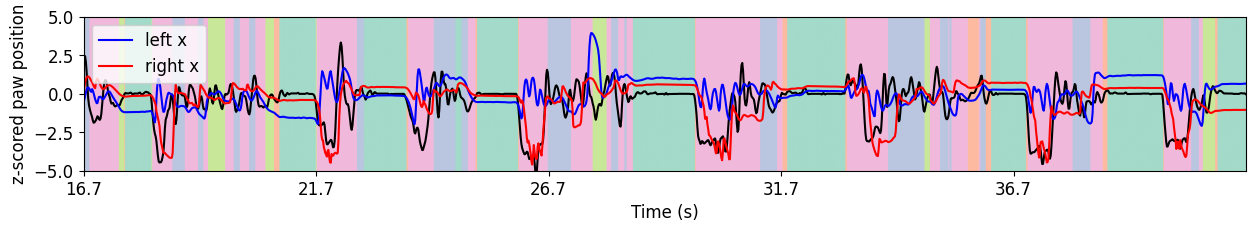

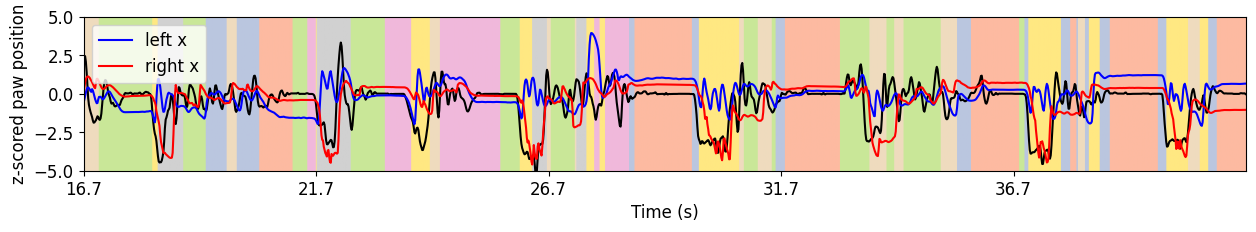

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],


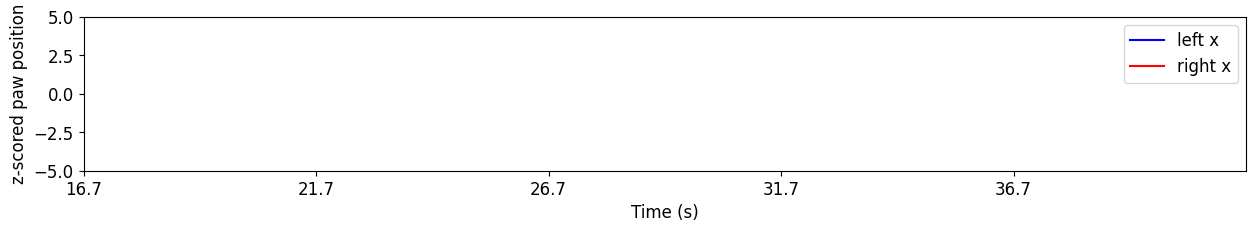

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


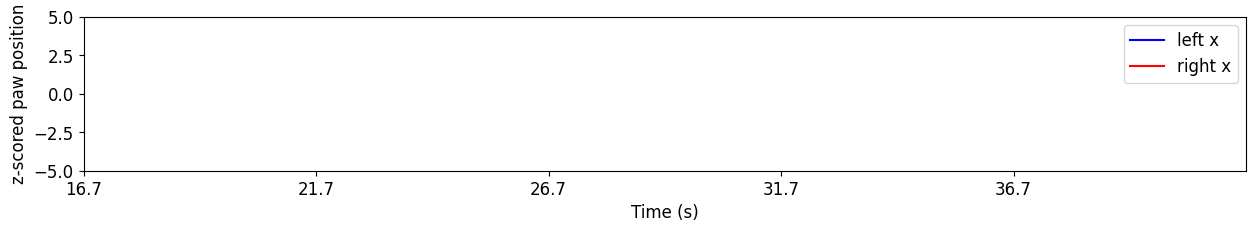

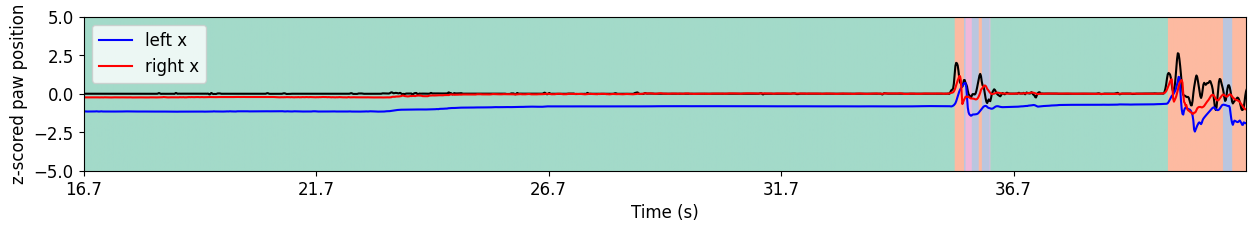

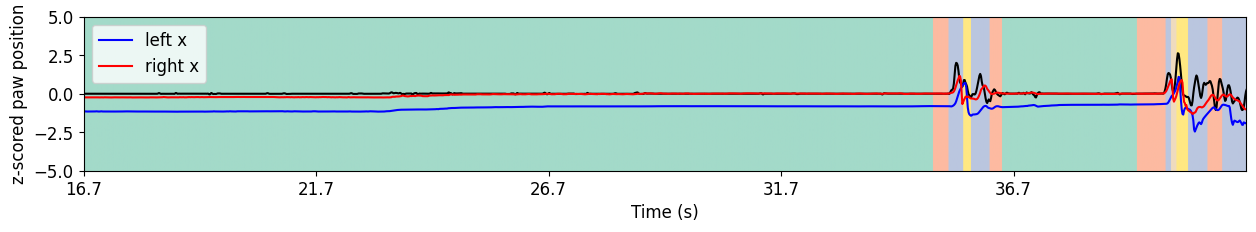

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],


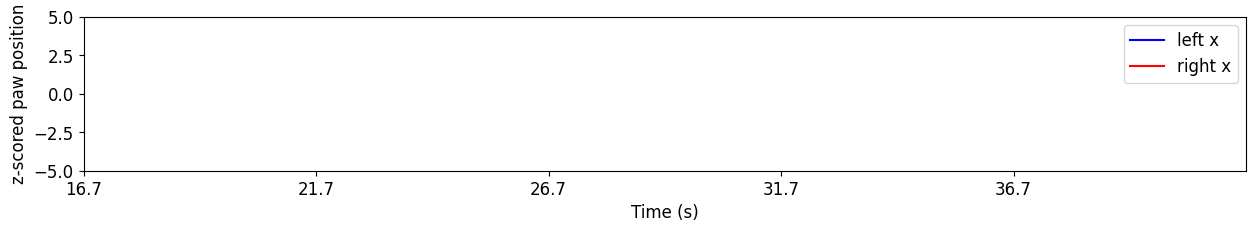

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


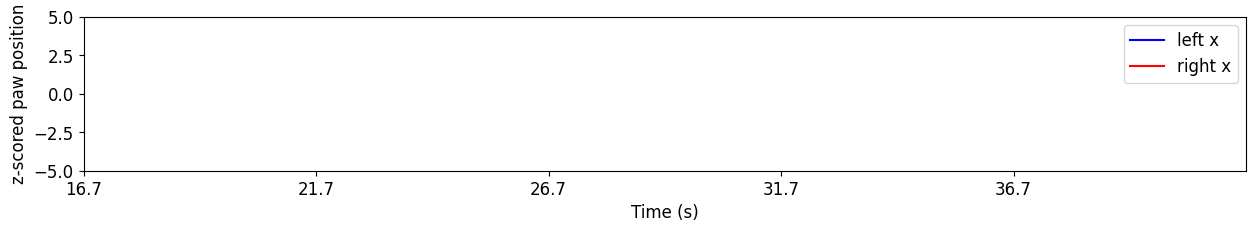

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],


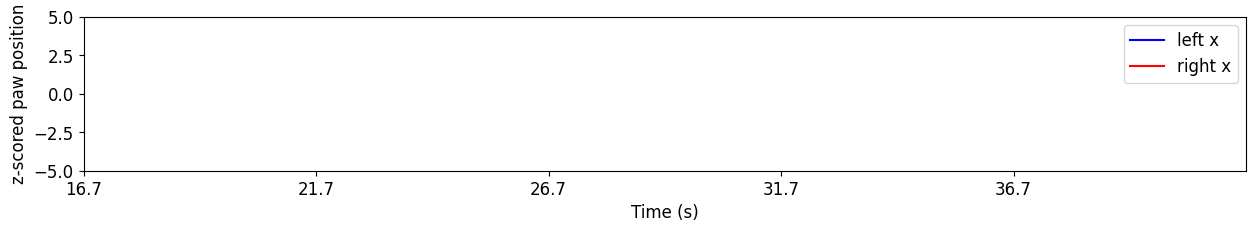

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


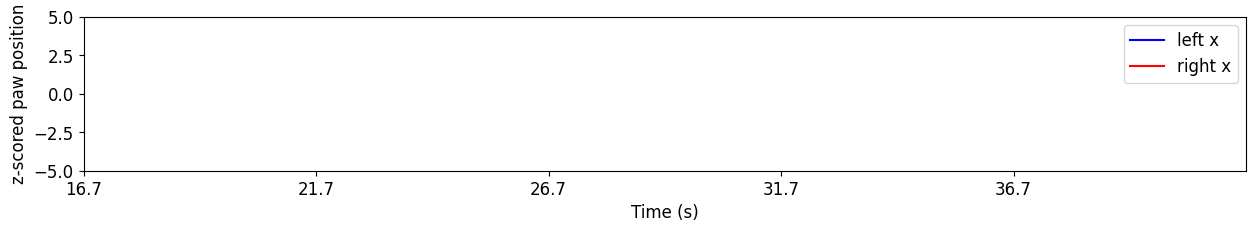

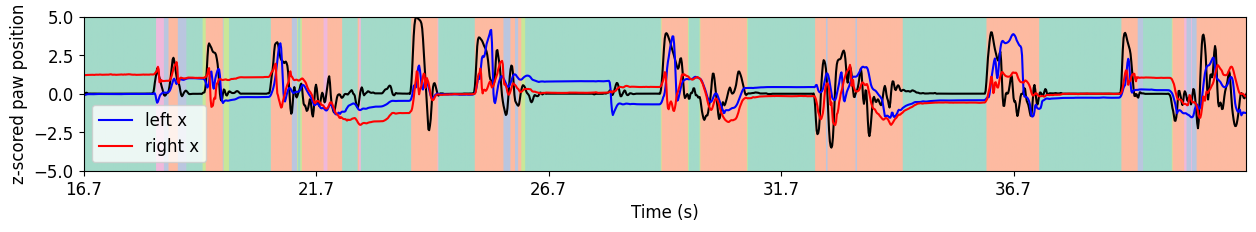

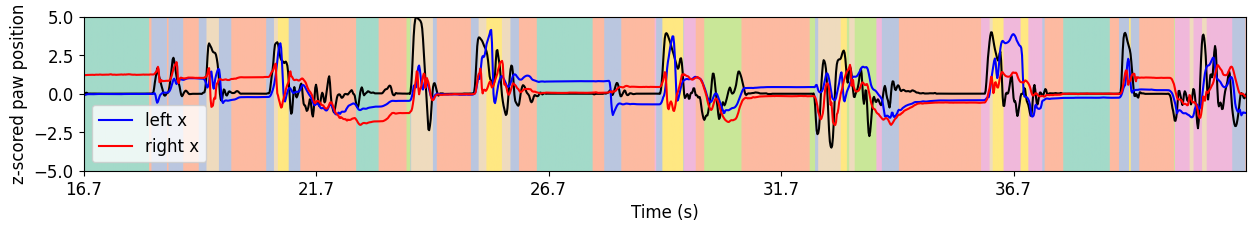

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],


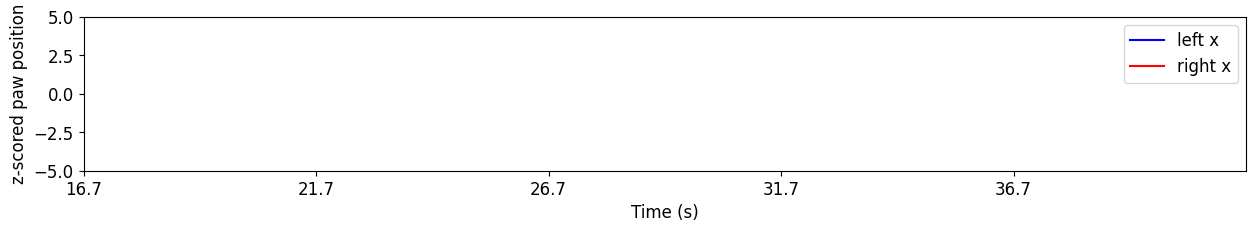

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


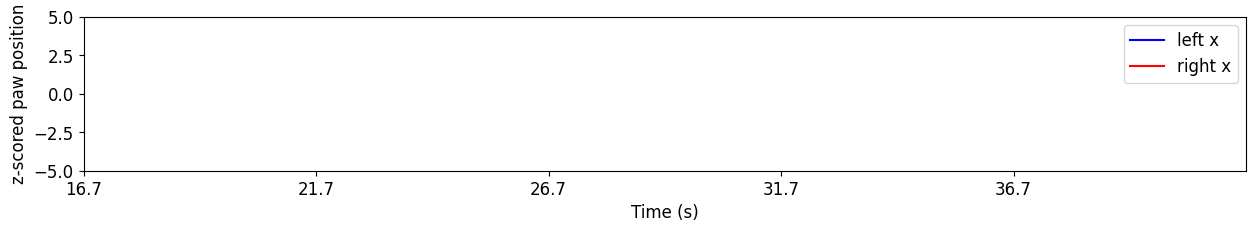

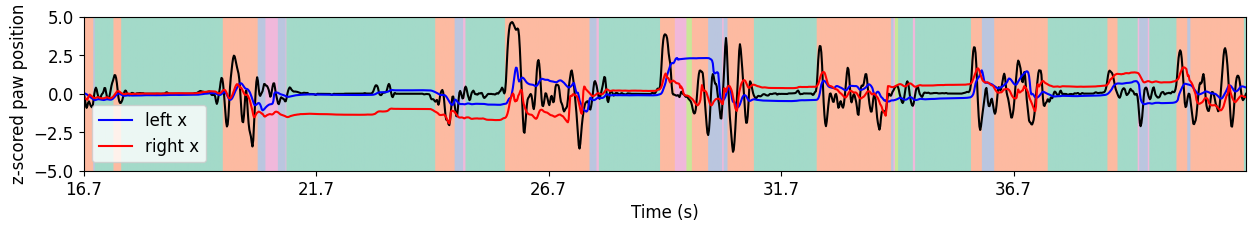

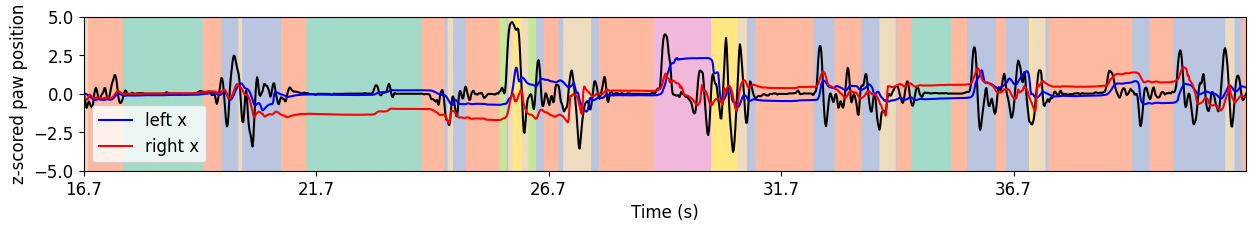

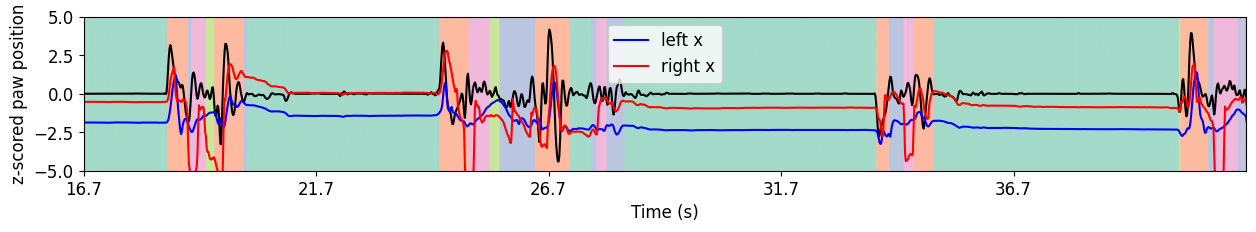

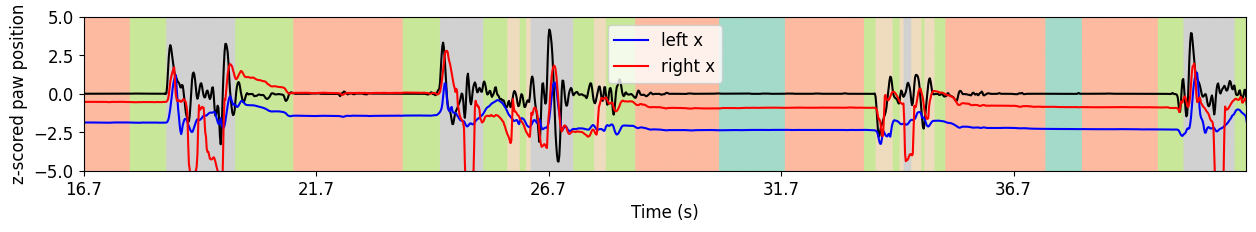

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],


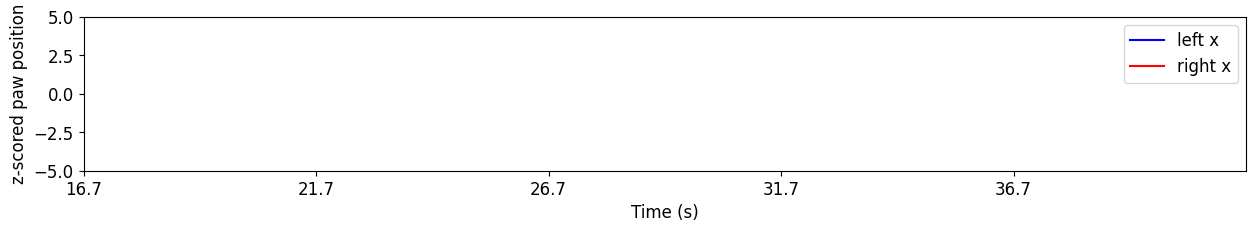

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


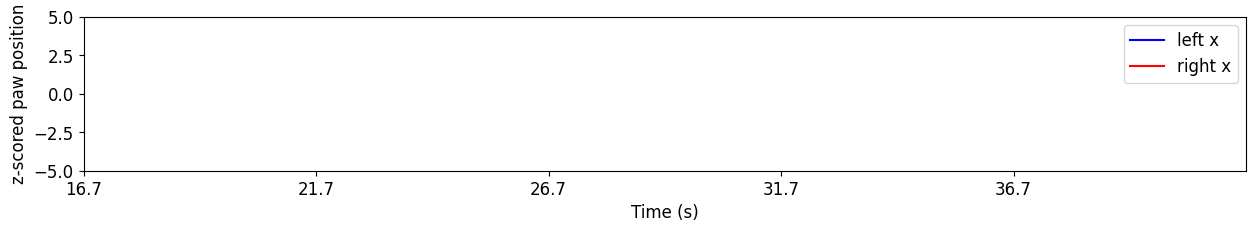

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],


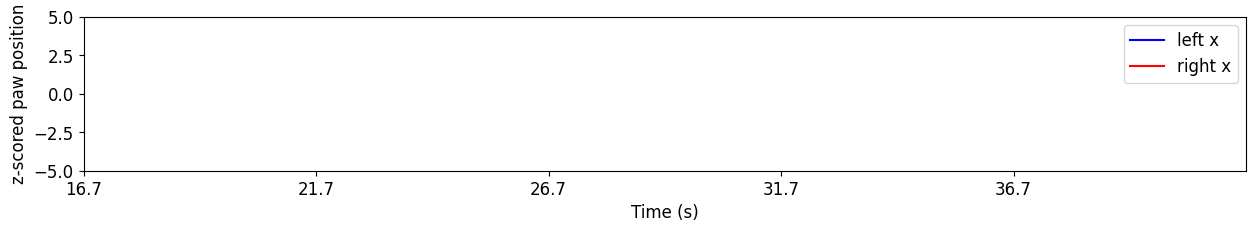

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


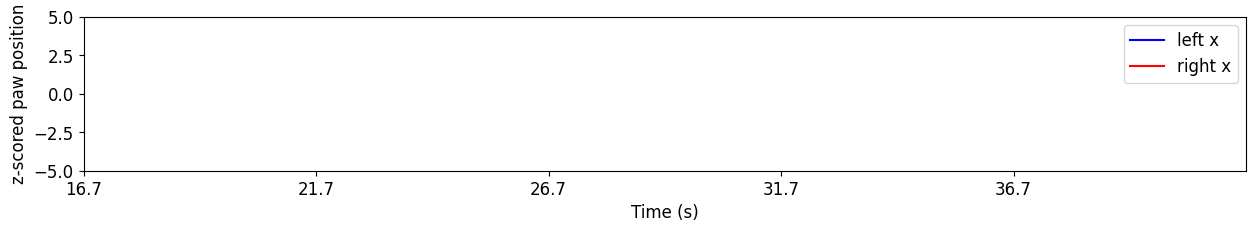

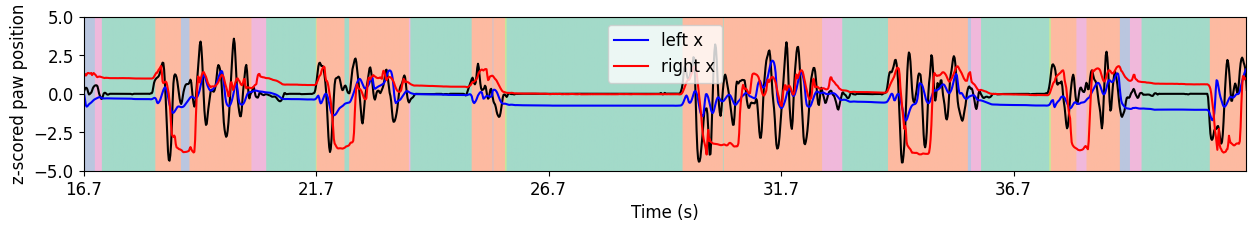

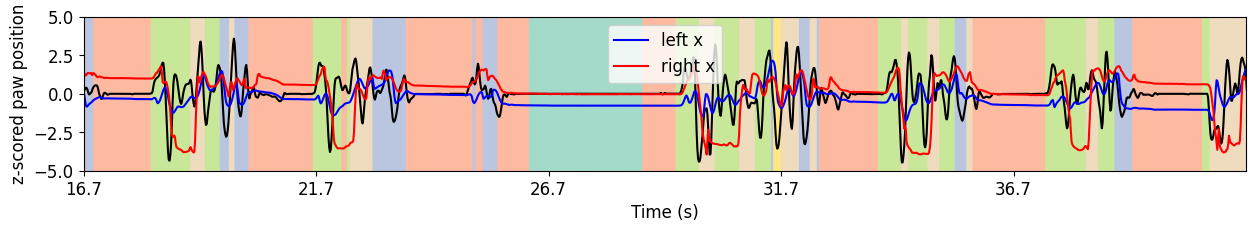

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],


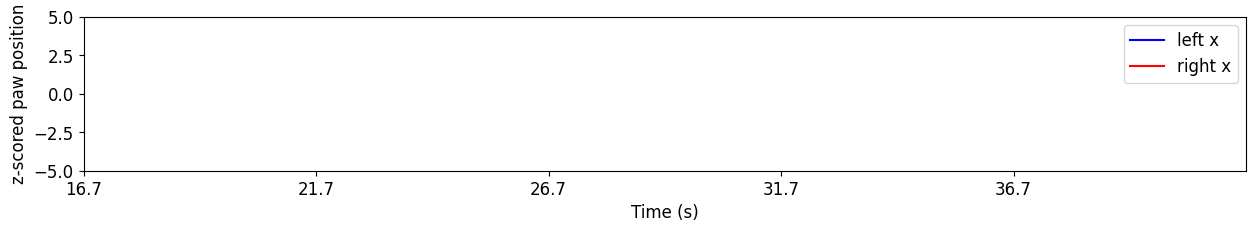

/var/folders/nt/d2j3zp9d1xzb8wgfrw81j0c40000gn/T/ipykernel_90355/2418584868.py:40: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],


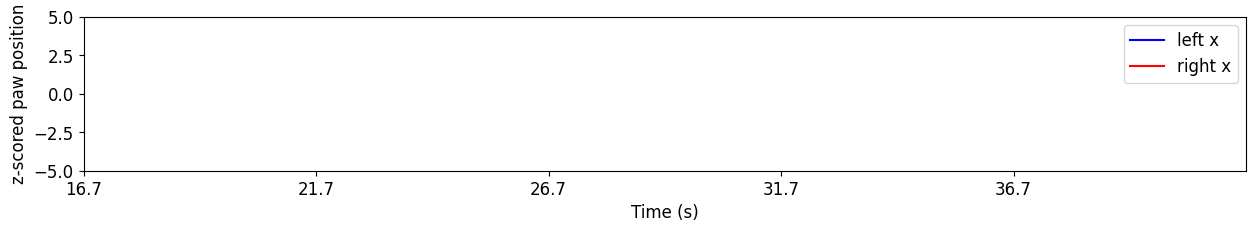

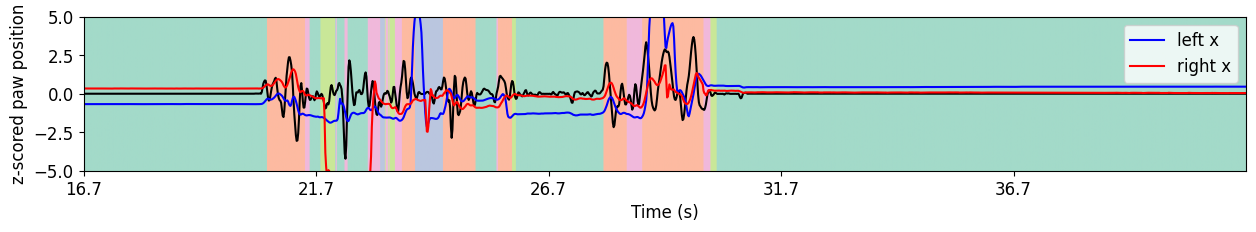

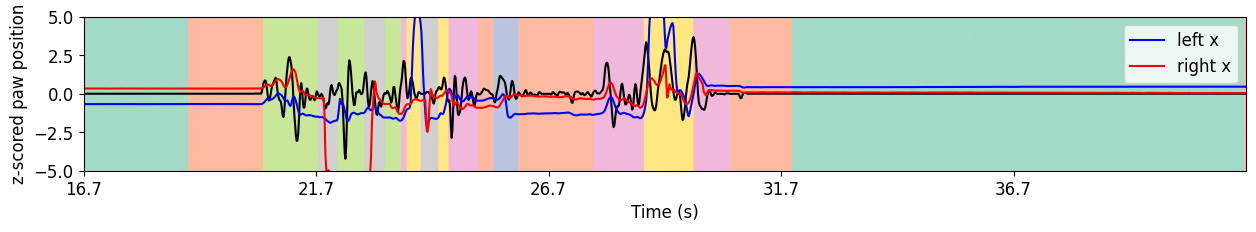

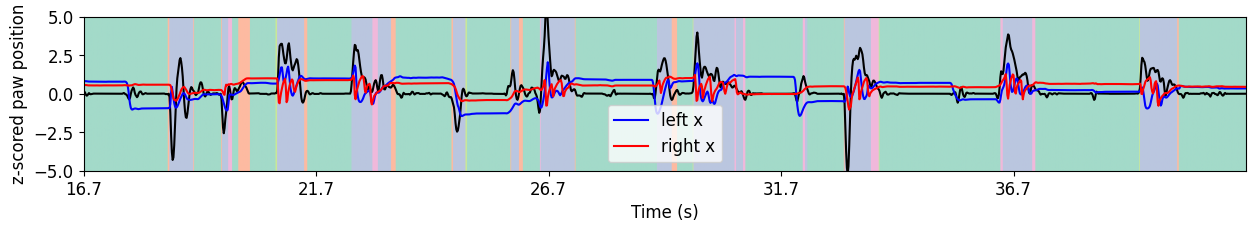

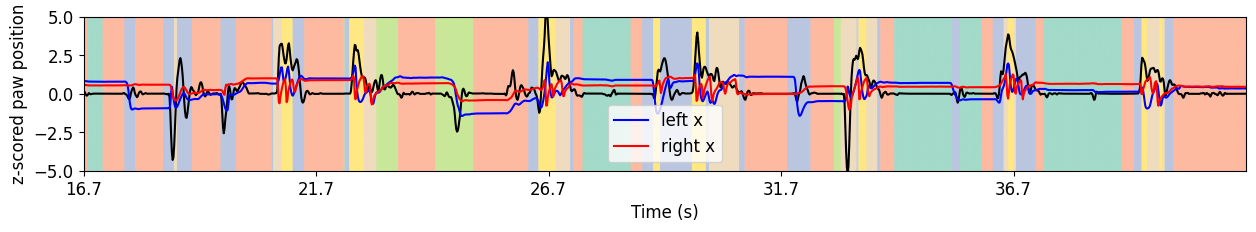

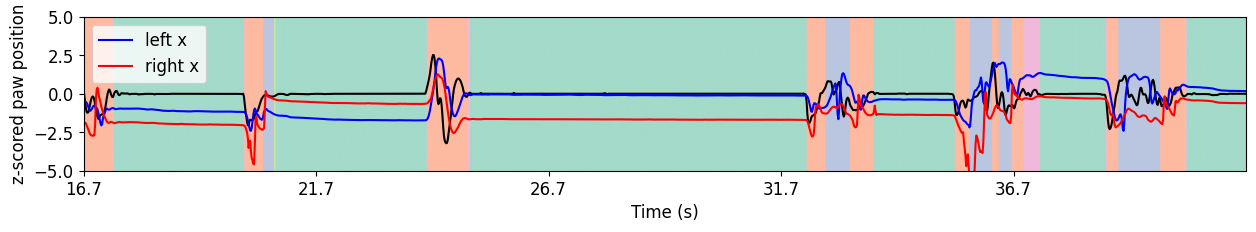

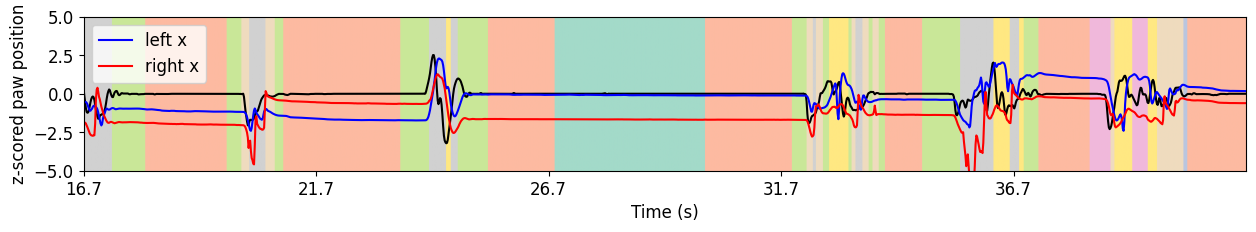

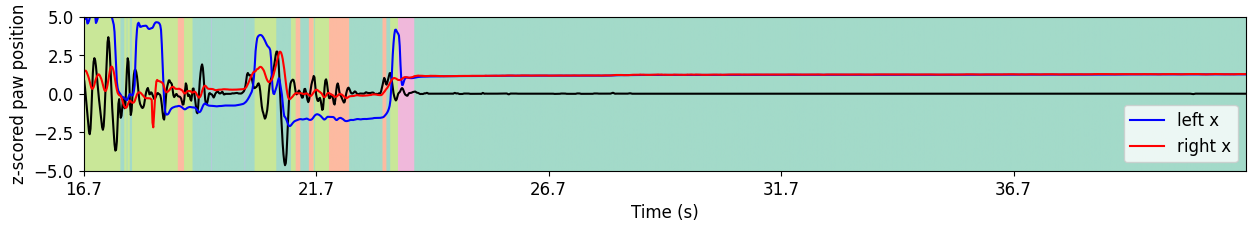

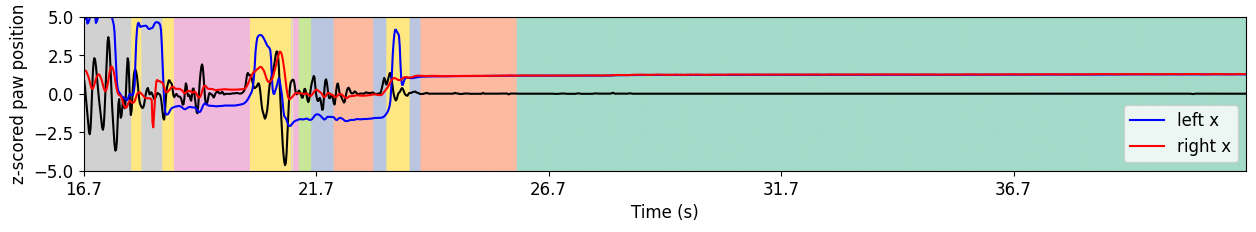

In [277]:
for m, mat in enumerate(new_df['session'].unique()):
    use_df = new_df.loc[new_df['session']==mat][['Bin', 'avg_wheel_vel', 'l_paw_x', 'r_paw_x', 'paw_states', 'left_paw', 'right_paw', 'joint']].dropna(axis=0)
    use_df['left_paw'] = pd.factorize(use_df['joint'])[0]

    fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 2])
    plt.rc('font', size=12)
    init = 1000
    ax.plot(use_df.loc[use_df['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    ax.plot(zscore(use_df.loc[use_df['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_y'].reset_index()['l_paw_y'], nan_policy='omit'), linestyle='--', color='green', label='left y')
    ax.plot(zscore(use_df.loc[use_df['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_y'].reset_index()['r_paw_y'], nan_policy='omit'), linestyle='--',color='red', label='right y')
    attach_array = np.arange(0, paw_k, 1)
    ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])[None,:],
                extent=(0, len(np.concatenate([use_df.loc[use_df['Bin']>=init, 'left_paw'].reset_index()['left_paw']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap=palette)  # 
    plt.xlim([init, init+1500])
    plt.ylabel('z-scored paw position')
    plt.xlabel('Time (s)')
    plt.ylim([-5, 5])
    inter = 1500
    frame_rate = 60
    plt.xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    # plt.xticks([2000, 2200, 2400, 2600, 2800, 3000], np.round(0.017*np.array([2000, 2200, 2400, 2600, 2800, 3000]), 2))
    plt.legend()
    plt.show()
    use_df['paw_states'] = use_df['paw_states'].astype(float)
    fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 2])
    plt.rc('font', size=12)
    init = 1000
    ax.plot(use_df.loc[use_df['Bin']>=init, 'avg_wheel_vel'].reset_index(), color='black')
    ax.plot(zscore(use_df.loc[use_df['Bin']>=init, 'l_paw_x'].reset_index()['l_paw_x'], nan_policy='omit'), color='blue', label='left x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'l_paw_y'].reset_index()['l_paw_y'], nan_policy='omit'), linestyle='--', color='green', label='left y')
    ax.plot(zscore(use_df.loc[use_df['Bin']>=init, 'r_paw_x'].reset_index()['r_paw_x'], nan_policy='omit'), color='red', label='right x')
    # ax.plot(stats.zscore(design_matrix.loc[design_matrix['Bin']>=init, 'r_paw_y'].reset_index()['r_paw_y'], nan_policy='omit'), linestyle='--',color='red', label='right y')
    attach_array = np.arange(0, paw_k, 1)
    ax.imshow(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])[None,:],
                extent=(0, len(np.concatenate([use_df.loc[use_df['Bin']>=init, 'paw_states'].reset_index()['paw_states']])), -10, 10),
                aspect="auto",
                alpha=0.6,
                cmap=palette)  # 
    plt.xlim([init, init+1500])
    plt.ylabel('z-scored paw position')
    plt.xlabel('Time (s)')
    plt.ylim([-5, 5])
    inter = 1500
    frame_rate = 60
    plt.xticks(np.arange(init, init+inter, inter/5), np.round(np.arange(init/frame_rate, 
                  (init+inter)/frame_rate, (inter/frame_rate)/5), 1))
    # plt.xticks([2000, 2200, 2400, 2600, 2800, 3000], np.round(0.017*np.array([2000, 2200, 2400, 2600, 2800, 3000]), 2))
    plt.legend()
    plt.show()

In [209]:
melted = pd.melt(new_df, id_vars=['Bin', 'session', 'paw_states', 'wheel_states', 'both_paws'], value_vars=["left_paw", 'right_paw'])
# melted['value'] = label_func(melted['value'])

In [208]:
melted.value.unique()

array(['still', 'wheel', 'move', 'groom', 'None'], dtype=object)

/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldc

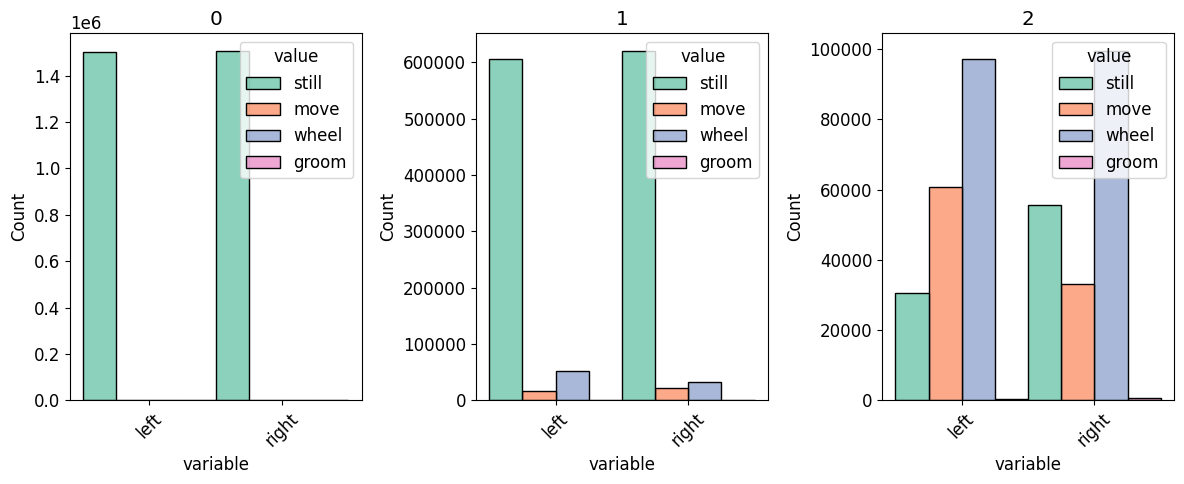

In [172]:
fig, ax = plt.subplots(ncols=3 , nrows=1, sharex=False, sharey=False, figsize=[12, 5])
use_states = 'wheel_states'
for v, var in enumerate(range(3)):
    use_data = melted.loc[melted['paw_states']==v]
    use_data = use_data.loc[use_data['value'].isin(['wheel', 'move', 'groom', 'still'])]

    sns.histplot(x='variable', hue='value', data=use_data, 
                 hue_order=['still', 'move', 'wheel', 'groom'], multiple='dodge', ax=ax[v], palette='Set2')
    ax[v].set_title(v)
    ax[v].set_xticks([0, 1], ['left', 'right'], rotation=45)
    # ax[7].legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()

/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/envs/iblenv/lib/python3.10/site-packages/seaborn/_oldc

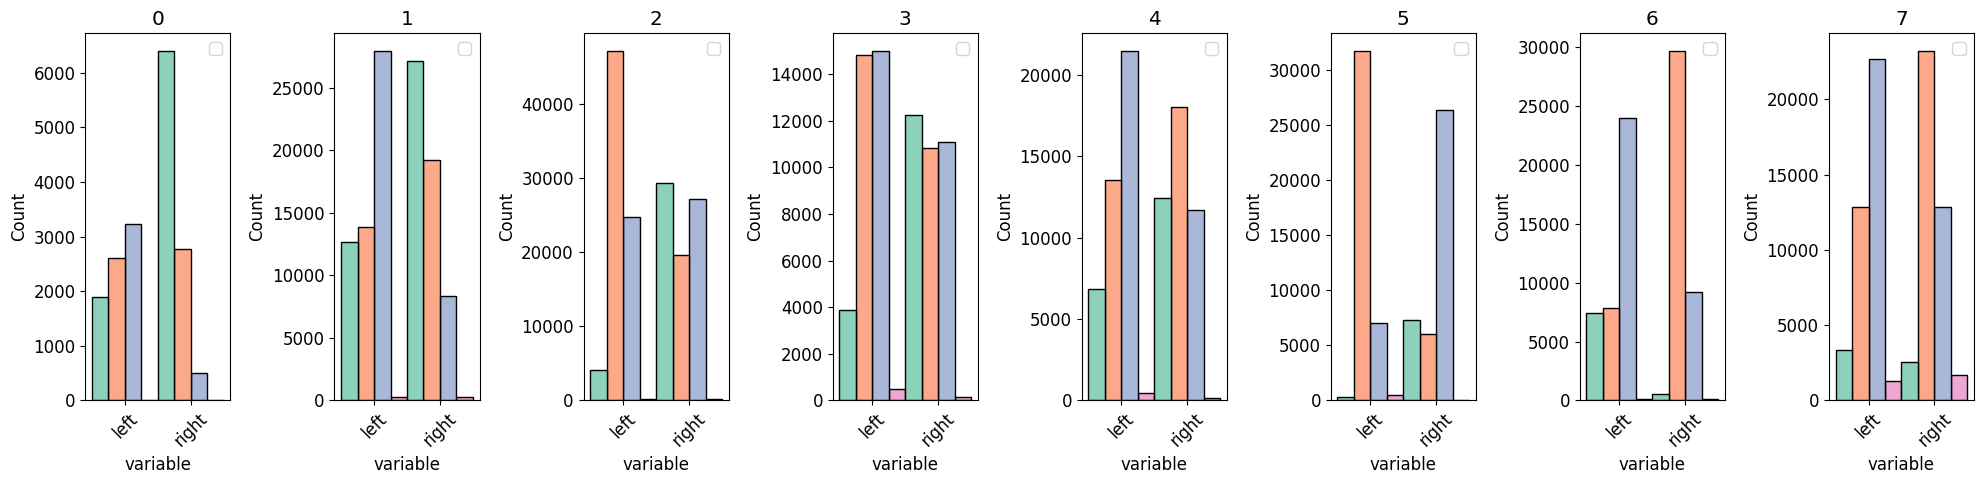

In [213]:
fig, ax = plt.subplots(ncols=8 , nrows=1, sharex=False, sharey=False, figsize=[20, 5])
use_states = 'paw_states'
for v, var in enumerate(range(8)):
    use_data = melted.loc[(melted['paw_states']==v) & (melted['both_paws']==0)]
    use_data = use_data.loc[use_data['value'].isin(['wheel', 'move', 'groom', 'still'])]

    sns.histplot(x='variable', hue='value', data=use_data, 
                 hue_order=['still', 'move', 'wheel', 'groom'], multiple='dodge', ax=ax[v], palette='Set2')
    ax[v].set_title(v)
    ax[v].set_xticks([0, 1], ['left', 'right'], rotation=45)
    # ax[7].legend(bbox_to_anchor=(1.1, 1.05))
    ax[v].legend()
plt.tight_layout()

In [223]:
new_df["paw_ratio"] = (new_df.groupby(['session', 'left_paw', 'right_paw'])['paw_states'].transform(lambda x: x / x.sum() if x.sum()>0 else 0))
new_df['joint'] = new_df['left_paw']+new_df['right_paw']

In [249]:
data = (
    new_df
    .groupby(['left_paw', 'right_paw', 'paw_states']) # 'session', 
    .size()
    .reset_index(name='count'))
data['usage'] = (
    data['count'] /
    data.groupby(['left_paw', 'right_paw'])['count'].transform('sum'))

data['joint'] = data['left_paw']+data['right_paw']

In [250]:
data = data.loc[data['left_paw'].isin(['still', 'move', 'wheel', 'groom'])]
data = data.loc[data['right_paw'].isin(['still', 'move', 'wheel', 'groom'])]

In [251]:
hue_order = ['stillstill', 'movemove', 'wheelwheel', 'groomgroom', 
 'stillmove', 'movestill', 'stillwheel', 'wheelstill',
 'groomstill', 'stillgroom', 
  'groommove', 'movegroom', 
 'groomwheel', 'wheelgroom', 'movewheel', 'wheelmove']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'stillstill'),
  Text(1, 0, 'movemove'),
  Text(2, 0, 'wheelwheel'),
  Text(3, 0, 'groomgroom'),
  Text(4, 0, 'stillmove'),
  Text(5, 0, 'movestill'),
  Text(6, 0, 'stillwheel'),
  Text(7, 0, 'wheelstill'),
  Text(8, 0, 'groomstill'),
  Text(9, 0, 'stillgroom'),
  Text(10, 0, 'groommove'),
  Text(11, 0, 'movegroom'),
  Text(12, 0, 'groomwheel'),
  Text(13, 0, 'wheelgroom'),
  Text(14, 0, 'movewheel'),
  Text(15, 0, 'wheelmove')])

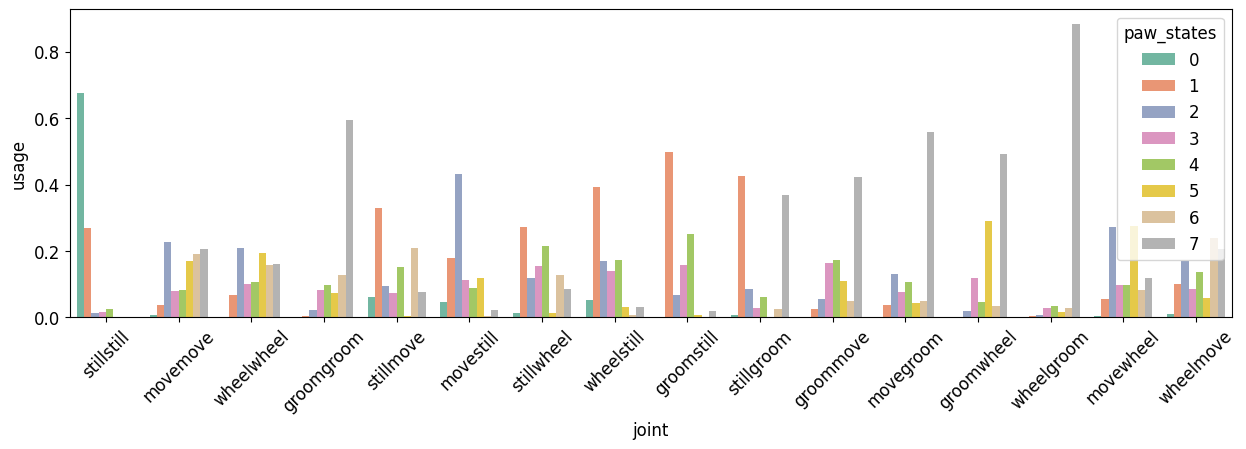

In [252]:
fig, ax = plt.subplots(ncols=1 , nrows=1, sharex=False, sharey=False, figsize=[15, 4])
sns.barplot(x='joint', hue='paw_states', y='usage', 
            order=hue_order, data=data, palette='Set2')
plt.xticks(rotation=45)

In [ ]:
fig, ax = plt.subplots(ncols=8 , nrows=1, sharex=False, sharey=False, figsize=[20, 5])
use_states = 'paw_states'
for v, var in enumerate(range(8)):
    use_data = melted.loc[(melted['paw_states']==v) & (melted['both_paws']==0)]
    use_data = use_data.loc[use_data['value'].isin(['wheel', 'move', 'groom', 'still'])]

    sns.barplot(x='variable', hue='value', data=use_data, 
                 hue_order=['still', 'move', 'wheel', 'groom'], multiple='dodge', ax=ax[v], palette='Set2')
    ax[v].set_title(v)
    ax[v].set_xticks([0, 1], ['left', 'right'], rotation=45)
    # ax[7].legend(bbox_to_anchor=(1.1, 1.05))
    ax[v].legend()
plt.tight_layout()

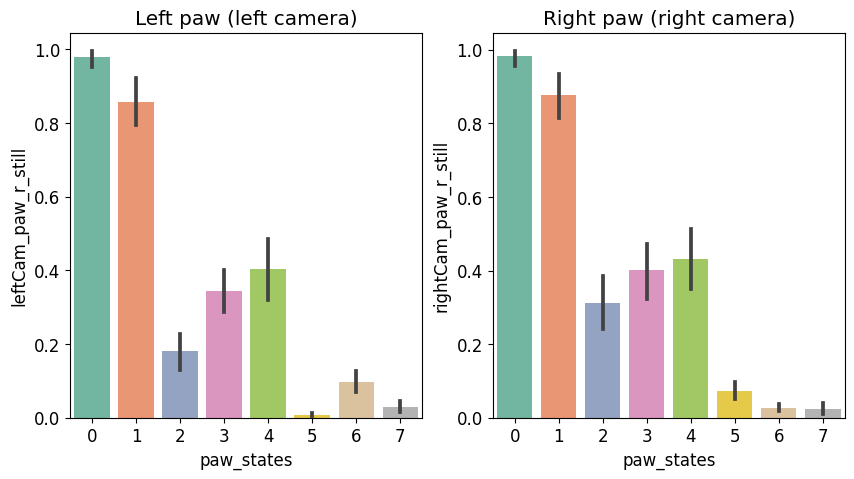

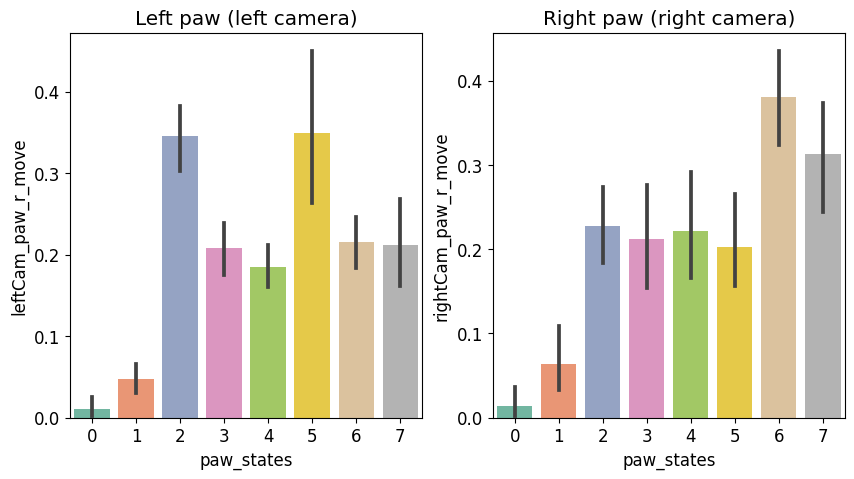

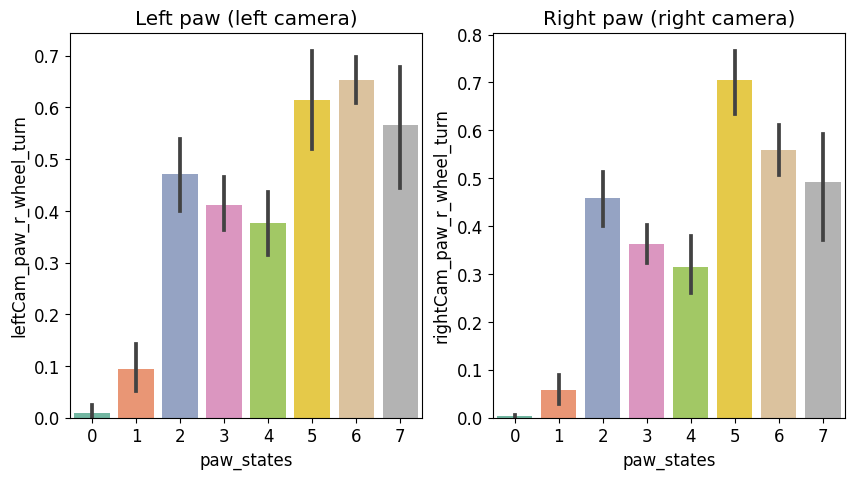

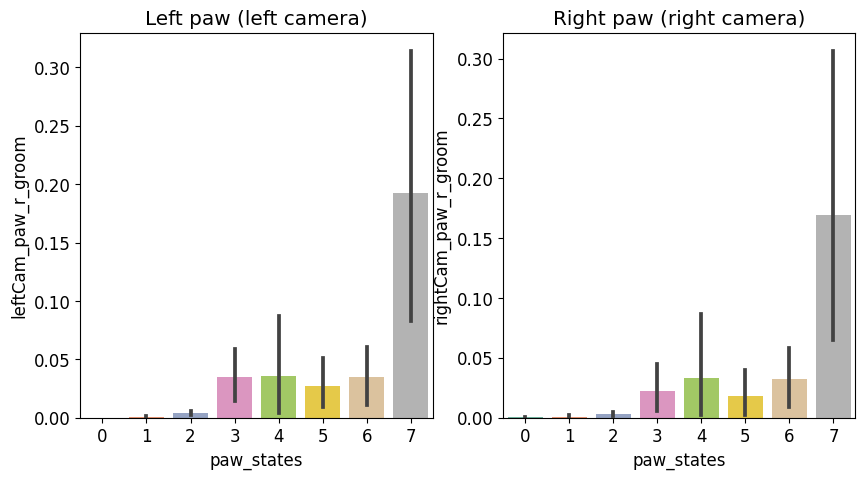

In [ ]:
var_left = ['leftCam_paw_r_still',  'leftCam_paw_r_move',  'leftCam_paw_r_wheel_turn',  'leftCam_paw_r_groom']
var_right = ['rightCam_paw_r_still',  'rightCam_paw_r_move',  'rightCam_paw_r_wheel_turn',  'rightCam_paw_r_groom']
titles = ['Left paw (left camera)', 'Right paw (right camera)']

use_states = 'paw_states'
for v, var in enumerate(range(len(var_left))):
    # use_data = 
    grouped_left = all_sessions.groupby(['session', use_states])[var_left[v]].mean().reset_index()
    grouped_right = all_sessions.groupby(['session', use_states])[var_right[v]].mean().reset_index()
    fig, ax = plt.subplots(ncols=2 , nrows=1, sharex=False, sharey=False, figsize=[10, 5])

    sns.barplot(x=use_states, y=var_left[v], data=grouped_left, ax=ax[0], palette='Set2')
    sns.barplot(x=use_states, y=var_right[v], data=grouped_right, ax=ax[1], palette='Set2')
    ax[0].set_title(titles[0])
    ax[1].set_title(titles[1])
    plt.show()

In [ ]:
var_left = ['leftCam_paw_r_still',  'leftCam_paw_r_move',  'leftCam_paw_r_wheel_turn',  'leftCam_paw_r_groom']
var_right = ['rightCam_paw_r_still',  'rightCam_paw_r_move',  'rightCam_paw_r_wheel_turn',  'rightCam_paw_r_groom']
titles = ['Left paw (left camera)', 'Right paw (right camera)']
for v, var in enumerate(range(len(var_left))):
    fig, ax = plt.subplots(ncols=2 , nrows=1, sharex=False, sharey=False, figsize=[10, 5])

    sns.barplot(x='paw_states', y=var_left[v], data=all_sessions, ax=ax[0])
    sns.barplot(x='paw_states', y=var_right[v], data=all_sessions, ax=ax[1])
    ax[0].set_title(titles[0])
    ax[1].set_title(titles[1])
    plt.show()